# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [199]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [200]:
websites = pd.read_csv('../data/website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [201]:
websites.shape

(1781, 21)

In [202]:
websites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
URL                          1781 non-null object
URL_LENGTH                   1781 non-null int64
NUMBER_SPECIAL_CHARACTERS    1781 non-null int64
CHARSET                      1781 non-null object
SERVER                       1780 non-null object
CONTENT_LENGTH               969 non-null float64
WHOIS_COUNTRY                1781 non-null object
WHOIS_STATEPRO               1781 non-null object
WHOIS_REGDATE                1781 non-null object
WHOIS_UPDATED_DATE           1781 non-null object
TCP_CONVERSATION_EXCHANGE    1781 non-null int64
DIST_REMOTE_TCP_PORT         1781 non-null int64
REMOTE_IPS                   1781 non-null int64
APP_BYTES                    1781 non-null int64
SOURCE_APP_PACKETS           1781 non-null int64
REMOTE_APP_PACKETS           1781 non-null int64
SOURCE_APP_BYTES             1781 non-null int64
REMOTE_APP_BYTES             1781 non-null int64
APP

In [203]:
websites.head(10)

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0
5,B0_2064,18,7,UTF-8,nginx,NaN,SC,Mahe,3/08/2016 14:30,3/10/2016 3:45,...,6,9,894,11,13,838,894,11,0.0,0
6,B0_462,18,6,iso-8859-1,Apache/2,345.0,US,CO,29/07/2002 0:00,1/07/2016 0:00,...,0,3,1189,14,13,8559,1327,14,2.0,0
7,B0_1128,19,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,US,FL,18/03/1997 0:00,19/03/2017 0:00,...,0,0,0,0,0,0,0,0,0.0,0
8,M2_17,20,5,utf-8,nginx/1.10.1,NaN,None,None,8/11/2014 7:41,None,...,0,0,0,2,3,213,146,2,2.0,1
9,M3_75,20,5,utf-8,nginx/1.10.1,NaN,None,None,8/11/2014 7:41,None,...,0,0,0,2,1,62,146,2,2.0,1


In [204]:
websites.describe()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
count,1781.000000,1781.000000,969.000000,1781.000000,1781.000000,1781.000000,1.781000e+03,1781.000000,1781.000000,1.781000e+03,1.781000e+03,1781.000000,1780.000000,1781.000000
mean,56.961258,11.111735,11726.927761,16.261089,5.472768,3.060640,2.982339e+03,18.540146,18.746210,1.589255e+04,3.155599e+03,18.540146,2.263483,0.121280
std,27.555586,4.549896,36391.809051,40.500975,21.807327,3.386975,5.605057e+04,41.627173,46.397969,6.986193e+04,5.605378e+04,41.627173,2.930853,0.326544
min,16.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,39.000000,8.000000,324.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,49.000000,10.000000,1853.000000,7.000000,0.000000,2.000000,6.720000e+02,8.000000,9.000000,5.790000e+02,7.350000e+02,8.000000,0.000000,0.000000
75%,68.000000,13.000000,11323.000000,22.000000,5.000000,5.000000,2.328000e+03,26.000000,25.000000,9.806000e+03,2.701000e+03,26.000000,4.000000,0.000000
max,249.000000,43.000000,649263.000000,1194.000000,708.000000,17.000000,2.362906e+06,1198.000000,1284.000000,2.060012e+06,2.362906e+06,1198.000000,20.000000,1.000000


In [205]:
'''
For it to be supervised learning we are missing the "true/not" labels in a feature that we will then use as a target.
The best candidate is the Type variable
'''
websites['Type'].value_counts()



0    1565
1     216
Name: Type, dtype: int64

#### Next, evaluate if the columns in this dataset are strongly correlated.

In the Mushroom supervised learning lab we did recently, we mentioned we are concerned if our dataset has strongly correlated columns because if it is the case we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

In [206]:
#You will create a correlation matrix using the numeric columns in the dataset.

aa = websites.corr()
aa

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
URL_LENGTH,1.000000,0.917986,0.129745,-0.038407,-0.039839,-0.046367,-0.026446,-0.042264,-0.033779,-0.014857,-0.026686,-0.042264,-0.068582,0.162104
NUMBER_SPECIAL_CHARACTERS,0.917986,1.000000,0.214225,-0.037459,-0.042619,-0.047103,-0.023914,-0.040096,-0.030597,-0.014376,-0.024098,-0.040096,-0.050048,0.280897
CONTENT_LENGTH,0.129745,0.214225,1.000000,0.078451,-0.000381,0.004774,0.051202,0.074142,0.091077,0.100094,0.047595,0.074142,-0.045644,-0.090852
TCP_CONVERSATION_EXCHANGE,-0.038407,-0.037459,0.078451,1.000000,0.555188,0.331080,0.457320,0.997796,0.990848,0.865580,0.458702,0.997796,0.349832,-0.040202
DIST_REMOTE_TCP_PORT,-0.039839,-0.042619,-0.000381,0.555188,1.000000,0.210188,0.780238,0.558612,0.591188,0.313359,0.781212,0.558612,0.259942,-0.082925
REMOTE_IPS,-0.046367,-0.047103,0.004774,0.331080,0.210188,1.000000,0.023126,0.361104,0.304683,0.171651,0.025324,0.361104,0.548189,-0.078783
APP_BYTES,-0.026446,-0.023914,0.051202,0.457320,0.780238,0.023126,1.000000,0.445822,0.468999,0.074464,0.999992,0.445822,0.012221,-0.011262
SOURCE_APP_PACKETS,-0.042264,-0.040096,0.074142,0.997796,0.558612,0.361104,0.445822,1.000000,0.989285,0.857495,0.447448,1.000000,0.410843,-0.034414
REMOTE_APP_PACKETS,-0.033779,-0.030597,0.091077,0.990848,0.591188,0.304683,0.468999,0.989285,1.000000,0.880555,0.470401,0.989285,0.355716,-0.032897
SOURCE_APP_BYTES,-0.014857,-0.014376,0.100094,0.865580,0.313359,0.171651,0.074464,0.857495,0.880555,1.000000,0.075328,0.857495,0.215285,-0.043852


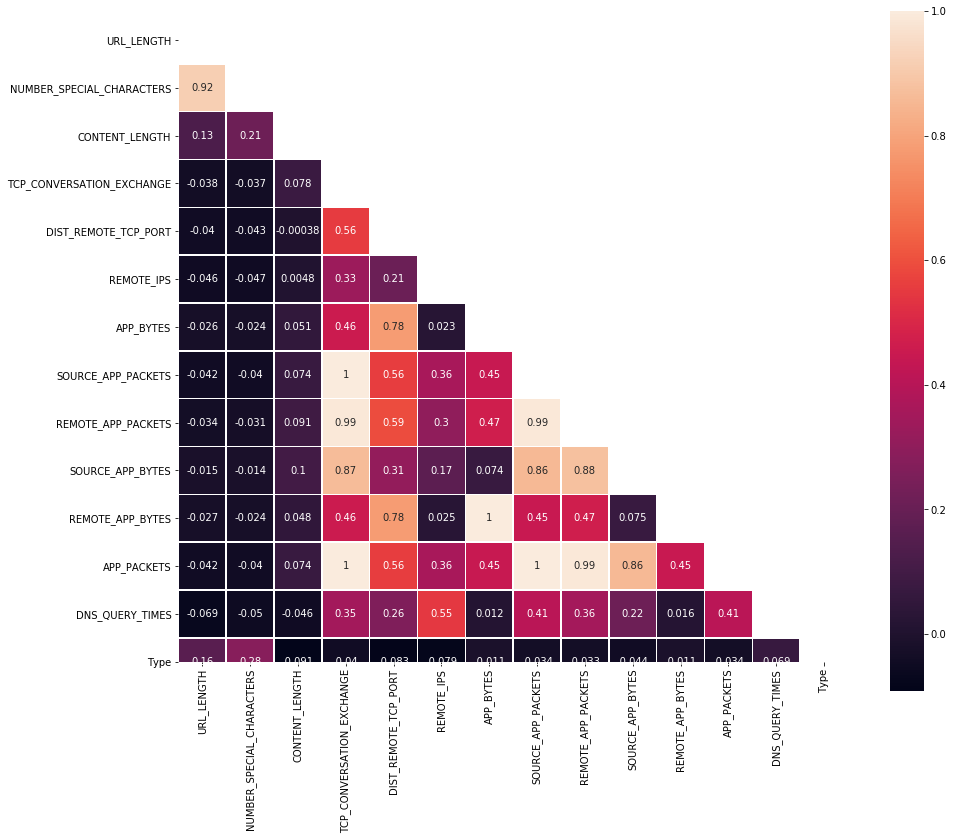

In [207]:
#Create a heatmap using seaborn to visualize which columns have high collinearity.

import matplotlib.pyplot as plt
import seaborn as sn

#Set up mask for triangle representation
mask = np.zeros_like(aa, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 25))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(aa, mask=mask,  vmax=1,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = aa)

plt.show()

In [208]:
# Comment on which columns you might need to remove due to high collinearity.

#https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas

#attempt 1: get the values for corr

s = aa.unstack().sort_values(ascending = False).drop_duplicates()
print(s)

Type                       Type                         1.000000
REMOTE_APP_BYTES           APP_BYTES                    0.999992
SOURCE_APP_PACKETS         TCP_CONVERSATION_EXCHANGE    0.997796
REMOTE_APP_PACKETS         TCP_CONVERSATION_EXCHANGE    0.990848
APP_PACKETS                REMOTE_APP_PACKETS           0.989285
                                                          ...   
NUMBER_SPECIAL_CHARACTERS  DNS_QUERY_TIMES             -0.050048
URL_LENGTH                 DNS_QUERY_TIMES             -0.068582
REMOTE_IPS                 Type                        -0.078783
Type                       DIST_REMOTE_TCP_PORT        -0.082925
                           CONTENT_LENGTH              -0.090852
Length: 79, dtype: float64


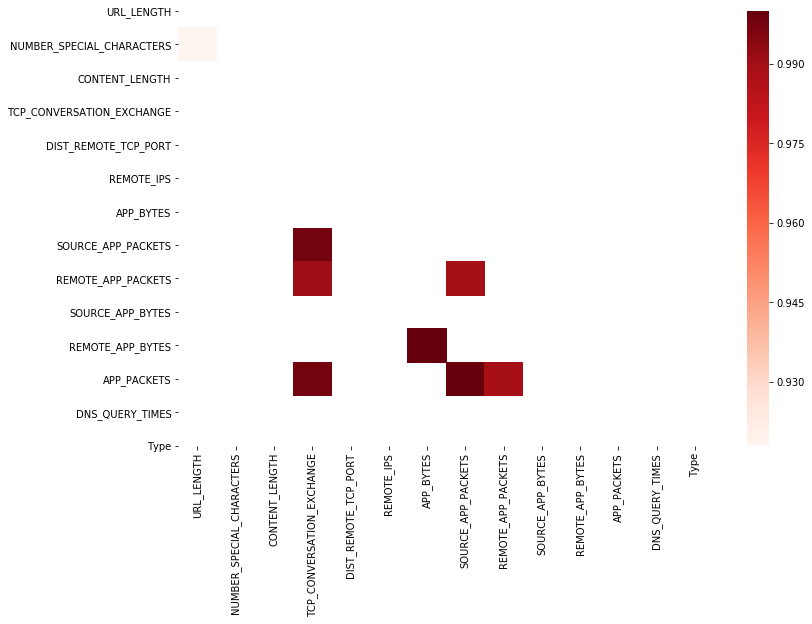

In [209]:
# attempt 2: visualise the values 

mask2 = np.zeros_like(aa, dtype=np.bool)
mask2[np.triu_indices_from(mask2)] = True

kot = aa[aa>=0.9]
plt.figure(figsize=(12,8))
sn.heatmap(kot, mask=mask2, cmap="Reds")


In [210]:
# Comment on which columns you might need to remove due to high collinearity.
'''
The column pairs that show high collinearity are:
REMOTE_APP_BYTES           APP_BYTES                    0.999992
SOURCE_APP_PACKETS         TCP_CONVERSATION_EXCHANGE    0.997796
REMOTE_APP_PACKETS         TCP_CONVERSATION_EXCHANGE    0.990848
APP_PACKETS                REMOTE_APP_PACKETS           0.989285

In the visualisation heatmap we can see that the columns showing more than 1 high correlation square are:
- APP_PACKETS
- TCP_CONVERSATION_EXCHANGE

The following features should also be considered for removal
- SOURCE_APP_PACKETS
- REMOTE_APP_PACKETS
'''


'\nThe column pairs that show high collinearity are:\nREMOTE_APP_BYTES           APP_BYTES                    0.999992\nSOURCE_APP_PACKETS         TCP_CONVERSATION_EXCHANGE    0.997796\nREMOTE_APP_PACKETS         TCP_CONVERSATION_EXCHANGE    0.990848\nAPP_PACKETS                REMOTE_APP_PACKETS           0.989285\n\nIn the visualisation heatmap we can see that the columns showing more than 1 high correlation square are:\n- APP_PACKETS\n- TCP_CONVERSATION_EXCHANGE\n\nThe following features should also be considered for removal\n- SOURCE_APP_PACKETS\n- REMOTE_APP_PACKETS\n'

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

In [211]:
# removing TCP_CONVERSATION_EXCHANGE

websites2 = websites.drop(columns = ['TCP_CONVERSATION_EXCHANGE'])
websites2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 20 columns):
URL                          1781 non-null object
URL_LENGTH                   1781 non-null int64
NUMBER_SPECIAL_CHARACTERS    1781 non-null int64
CHARSET                      1781 non-null object
SERVER                       1780 non-null object
CONTENT_LENGTH               969 non-null float64
WHOIS_COUNTRY                1781 non-null object
WHOIS_STATEPRO               1781 non-null object
WHOIS_REGDATE                1781 non-null object
WHOIS_UPDATED_DATE           1781 non-null object
DIST_REMOTE_TCP_PORT         1781 non-null int64
REMOTE_IPS                   1781 non-null int64
APP_BYTES                    1781 non-null int64
SOURCE_APP_PACKETS           1781 non-null int64
REMOTE_APP_PACKETS           1781 non-null int64
SOURCE_APP_BYTES             1781 non-null int64
REMOTE_APP_BYTES             1781 non-null int64
APP_PACKETS                  1781 non-null int64
DNS

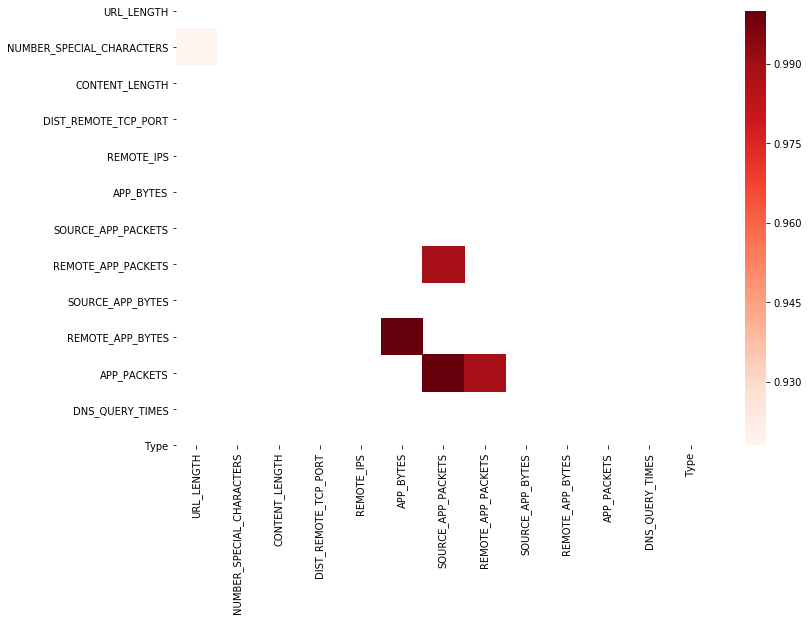

In [212]:
ab = websites2.corr()

mask3 = np.zeros_like(ab, dtype=np.bool)
mask3[np.triu_indices_from(mask3)] = True

kot = ab[ab>=0.9]
plt.figure(figsize=(12,8))
sn.heatmap(kot, mask=mask3, cmap="Reds")

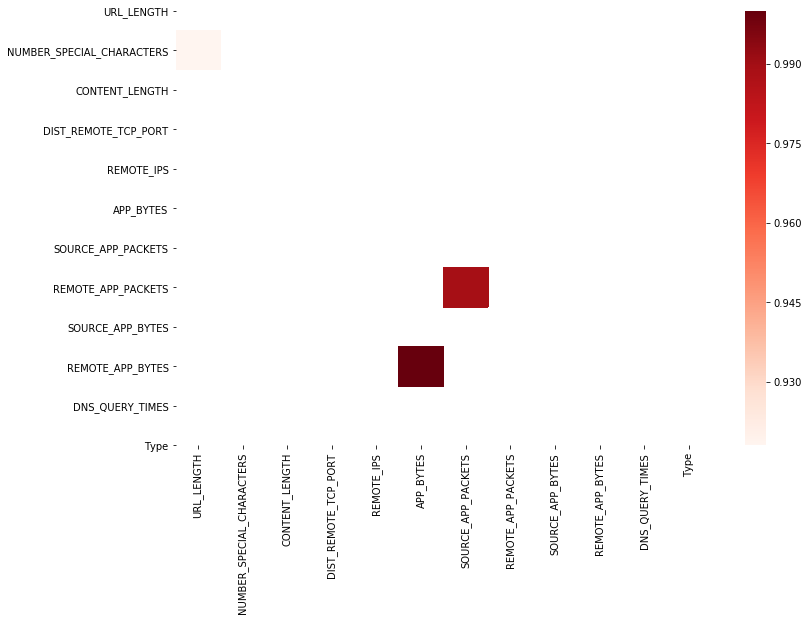

In [213]:
# removing the TCP_CONVERSATION_EXCHANGE improved the collinearity issues but we should also consider removing the AOO_PACKETS

websites3 = websites2.drop(columns = ['APP_PACKETS'])
ac = websites3.corr()

mask4 = np.zeros_like(ac, dtype=np.bool)
mask4[np.triu_indices_from(mask4)] = True

kot = ac[ac>=0.9]
plt.figure(figsize=(12,8))
sn.heatmap(kot, mask=mask4, cmap="Reds")

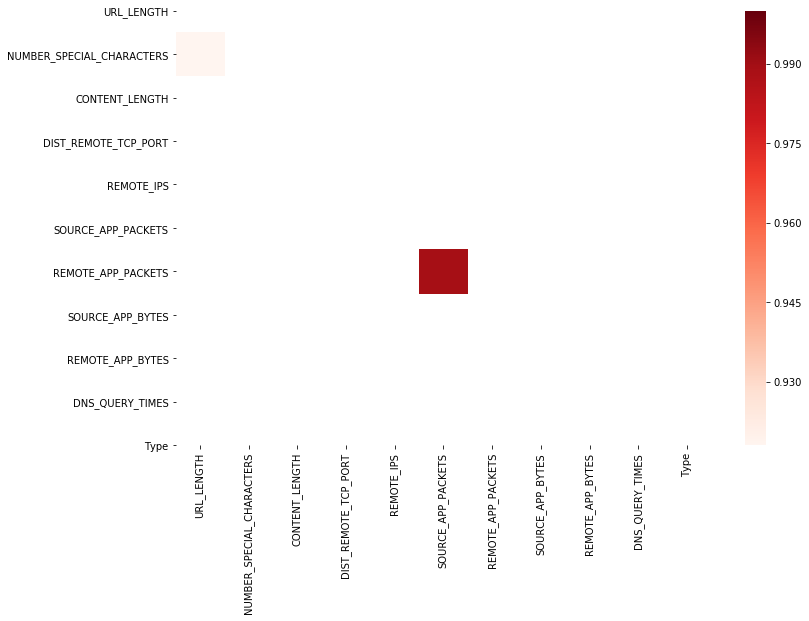

In [214]:
# removing the APP_BYTES
websites4 = websites3.drop(columns = ['APP_BYTES'])
ad = websites4.corr()

mask5 = np.zeros_like(ad, dtype=np.bool)
mask5[np.triu_indices_from(mask5)] = True

kot = ad[ad>=0.9]
plt.figure(figsize=(12,8))
sn.heatmap(kot, mask=mask5, cmap="Reds")

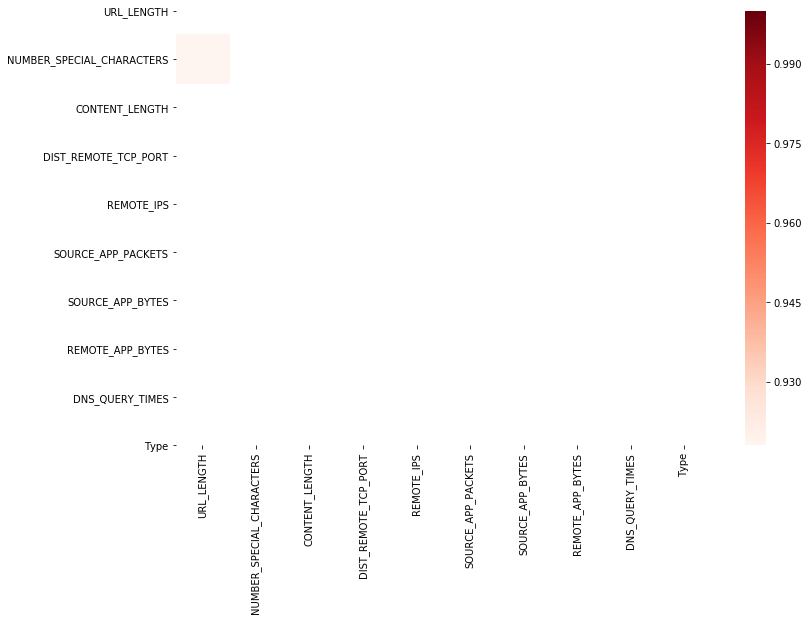

In [215]:
# removing the REMOTE_APP_PACKETS
websites5 = websites4.drop(columns = ['REMOTE_APP_PACKETS'])
ae = websites5.corr()

mask6 = np.zeros_like(ae, dtype=np.bool)
mask6[np.triu_indices_from(mask6)] = True

kot = ae[ae>=0.9]
plt.figure(figsize=(12,8))
sn.heatmap(kot, mask=mask6, cmap="Reds")

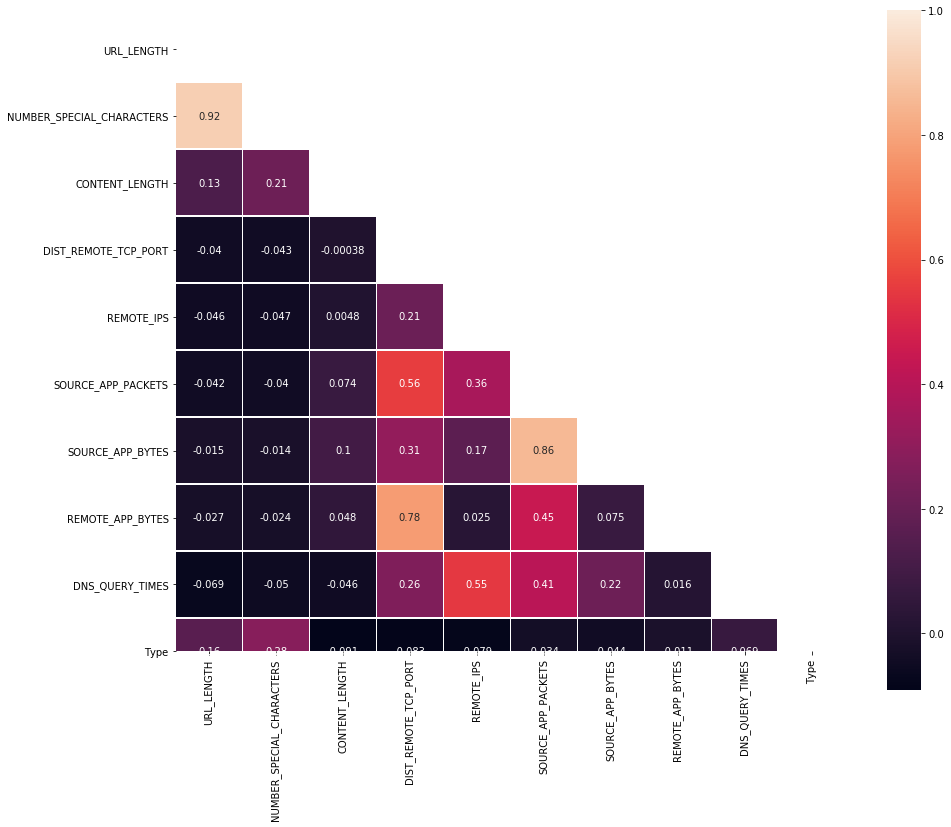

In [216]:
# Print heatmap again

mask6 = np.zeros_like(ae, dtype=np.bool)
mask6[np.triu_indices_from(mask6)] = True


# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 25))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(ae, mask=mask6,  vmax=1,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = ae)

plt.show()

# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [217]:
websites5.isna().sum()


URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        0
SERVER                         1
CONTENT_LENGTH               812
WHOIS_COUNTRY                  0
WHOIS_STATEPRO                 0
WHOIS_REGDATE                  0
WHOIS_UPDATED_DATE             0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
SOURCE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [218]:
# checking if the CONTENT_LENGTH missing values are unbalancing the dataset by calculating it's proportion

(812/len(websites5))*100


45.59236384053902

In [219]:
# 45% of the data is missing values belonging to the CONTENT_LENGTH column, will drop it

websites5.drop(columns=['CONTENT_LENGTH'], inplace = True)

#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [220]:
# Examine missing values in each column
websites5.isna().sum()

URL                          0
URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       1
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
SOURCE_APP_PACKETS           0
SOURCE_APP_BYTES             0
REMOTE_APP_BYTES             0
DNS_QUERY_TIMES              1
Type                         0
dtype: int64

# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [221]:
# List out the unique values of WHOIS_COUNTRY.
websites5['WHOIS_COUNTRY'].unique()

array(['None', 'US', 'SC', 'GB', 'UK', 'RU', 'AU', 'CA', 'PA', 'se', 'IN',
       'LU', 'TH', "[u'GB'; u'UK']", 'FR', 'NL', 'UG', 'JP', 'CN', 'SE',
       'SI', 'IL', 'ru', 'KY', 'AT', 'CZ', 'PH', 'BE', 'NO', 'TR', 'LV',
       'DE', 'ES', 'BR', 'us', 'KR', 'HK', 'UA', 'CH', 'United Kingdom',
       'BS', 'PK', 'IT', 'Cyprus', 'BY', 'AE', 'IE', 'UY', 'KG'],
      dtype=object)

In [222]:
# Adding RU to the consolidation
websites5.loc[websites5['WHOIS_COUNTRY'] == 'ru', 'WHOIS_COUNTRY'] = 'RU'

# Consolidate CY
websites5.loc[websites5['WHOIS_COUNTRY'] == 'Cyprus', 'WHOIS_COUNTRY'] = 'CY'

# Consolidate US
websites5.loc[websites['WHOIS_COUNTRY'] == 'us', 'WHOIS_COUNTRY'] = 'US'

# Consolidate SE
websites5.loc[websites5['WHOIS_COUNTRY'] == 'se', 'WHOIS_COUNTRY'] = 'SE'

# Consolidate UK
websites5.loc[websites5['WHOIS_COUNTRY'] == 'United Kingdom', 'WHOIS_COUNTRY'] = 'UK'
websites5.loc[websites5['WHOIS_COUNTRY'] == "[u'GB'; u'UK']", 'WHOIS_COUNTRY'] = 'UK'

In [223]:
websites5['WHOIS_COUNTRY'].unique()

array(['None', 'US', 'SC', 'GB', 'UK', 'RU', 'AU', 'CA', 'PA', 'SE', 'IN',
       'LU', 'TH', 'FR', 'NL', 'UG', 'JP', 'CN', 'SI', 'IL', 'KY', 'AT',
       'CZ', 'PH', 'BE', 'NO', 'TR', 'LV', 'DE', 'ES', 'BR', 'KR', 'HK',
       'UA', 'CH', 'BS', 'PK', 'IT', 'CY', 'BY', 'AE', 'IE', 'UY', 'KG'],
      dtype=object)

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

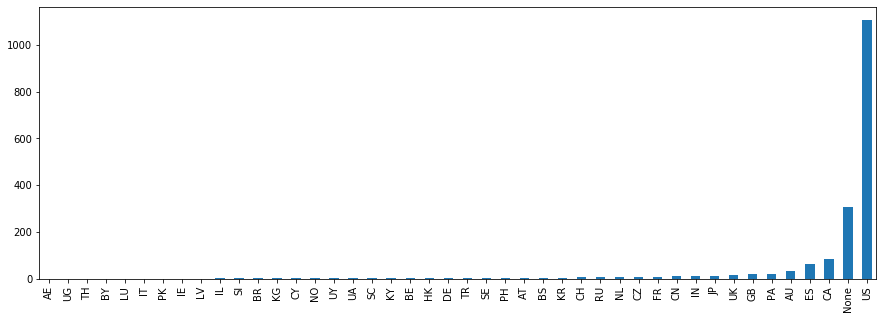

In [224]:
ba = websites5['WHOIS_COUNTRY'].value_counts().sort_values()
plt.subplots(figsize=(15, 5))
ba.plot(kind = 'bar')

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [225]:
#top 10 values

top10_triage = ba[-10:]
top_10_list = list(top10_triage.index)
top_10_list

['IN', 'JP', 'UK', 'GB', 'PA', 'AU', 'ES', 'CA', 'None', 'US']

In [226]:
#https://stackoverflow.com/questions/14057007/remove-rows-not-isinx

websites5.loc[websites5['WHOIS_COUNTRY'].isin(top_10_list) == False, 'WHOIS_COUNTRY'] = 'OTHER'
websites5['WHOIS_COUNTRY'].value_counts()

US       1106
None      306
OTHER     110
CA         84
ES         63
AU         35
PA         21
GB         19
UK         16
JP         11
IN         10
Name: WHOIS_COUNTRY, dtype: int64

Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [227]:
websites5.drop(['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'], axis = 1, inplace = True)

In [228]:
websites5

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_COUNTRY,DIST_REMOTE_TCP_PORT,REMOTE_IPS,SOURCE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,None,0,2,9,1153,832,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,None,7,4,17,1265,1230,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,None,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,US,22,3,39,18784,4380,8.0,0
4,B0_403,17,6,UTF-8,None,US,2,5,61,129889,4586,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,M4_48,194,16,UTF-8,Apache,ES,0,0,0,186,0,0.0,1
1777,M4_41,198,17,UTF-8,Apache,ES,0,0,0,124,0,0.0,1
1778,B0_162,201,34,utf-8,Apache/2.2.16 (Debian),US,2,6,87,132181,6945,4.0,0
1779,B0_1152,234,34,ISO-8859-1,cloudflare-nginx,US,0,0,0,0,0,0.0,0


# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [229]:
websites5.dtypes


URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
WHOIS_COUNTRY                 object
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
SOURCE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [230]:
websites5.drop('URL', axis = 1, inplace = True)


In [231]:
websites5.dtypes

URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
WHOIS_COUNTRY                 object
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
SOURCE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [232]:
websites5['CHARSET'].unique()

array(['iso-8859-1', 'UTF-8', 'us-ascii', 'ISO-8859-1', 'utf-8', 'None',
       'windows-1251', 'ISO-8859', 'windows-1252'], dtype=object)

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [233]:
websites5['SERVER'].unique()


array(['nginx', 'Apache/2.4.10', 'Microsoft-HTTPAPI/2.0', 'None',
       'Apache/2', 'nginx/1.10.1', 'Apache', 'Apache/2.2.15 (Red Hat)',
       'Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'openresty/1.11.2.1', 'Apache/2.2.22', 'Apache/2.4.7 (Ubuntu)',
       'nginx/1.12.0',
       'Apache/2.4.12 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'Oracle-iPlanet-Web-Server/7.0', 'cloudflare-nginx', 'nginx/1.6.2',
       'openresty', 'Heptu web server', 'Pepyaka/1.11.3', 'nginx/1.8.0',
       'nginx/1.10.1 + Phusion Passenger 5.0.30',
       'Apache/2.2.29 (Amazon)', 'Microsoft-IIS/7.5', 'LiteSpeed',
       'Apache/2.4.25 (cPanel) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'tsa_c', 'Apache/2.2.0 (Fedora)', 'Apache/2.2.22 (Debian)',
       'Apache/2.2.15 (CentOS)', 'Apache/2.4.25',
       'Apache/2.4.25 (Amazon) PHP/7.0.14', 'GSE',
       'Apache/2.4.23 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4',
       'Apache/2.4.25 (Amazon) OpenSSL/1.0.1k-fips'

![Think Hard](../images/think-hard.jpg)

In [234]:
#here I would probably use the first string up to / or the provider named between the parenthesis 

# up to /: .split('/')[0]
# parenthesis: .match(/\((.*)\)/)


Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [244]:
# using loc returned `cannot index with vector containing NA / NaN values` 
# trying a loop returned argument of type 'float' is not iterable for 'Apache'

websites5['SERVER'] = np.where(websites5['SERVER'].str.contains("Microsoft"), "Microsoft",np.where(websites5['SERVER'].str.contains("nginx"), "nginx", np.where(websites5['SERVER'].str.contains("Apache"), "Apache", "Other")))

In [245]:
# Count `SERVER` value counts here
websites5['SERVER'].value_counts()

Apache       643
Other        504
nginx        435
Microsoft    199
Name: SERVER, dtype: int64

OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)). Also, assign the data with dummy values to a new variable `website_dummy`.**

In [269]:
website_dummy = pd.get_dummies(websites5)


Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [270]:
website_dummy.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1780 entries, 0 to 1780
Data columns (total 33 columns):
URL_LENGTH                   1780 non-null int64
NUMBER_SPECIAL_CHARACTERS    1780 non-null int64
DIST_REMOTE_TCP_PORT         1780 non-null int64
REMOTE_IPS                   1780 non-null int64
SOURCE_APP_PACKETS           1780 non-null int64
SOURCE_APP_BYTES             1780 non-null int64
REMOTE_APP_BYTES             1780 non-null int64
DNS_QUERY_TIMES              1780 non-null float64
Type                         1780 non-null int64
CHARSET_ISO-8859             1780 non-null uint8
CHARSET_ISO-8859-1           1780 non-null uint8
CHARSET_None                 1780 non-null uint8
CHARSET_UTF-8                1780 non-null uint8
CHARSET_iso-8859-1           1780 non-null uint8
CHARSET_us-ascii             1780 non-null uint8
CHARSET_utf-8                1780 non-null uint8
CHARSET_windows-1251         1780 non-null uint8
CHARSET_windows-1252         1780 non-null uint8
SERVER_Ap

# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [271]:
from sklearn.model_selection import train_test_split

# 'Type' is the target so we want to remove it from the non-target co-hort
data = website_dummy.drop('Type',axis = 1)

# test_size = 0.2
# train_size = 0.8
X_train, X_test, y_train, y_test = train_test_split(data, website_dummy['Type'], test_size = 0.2,random_state=0)


In [276]:
X_test

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,DIST_REMOTE_TCP_PORT,REMOTE_IPS,SOURCE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,DNS_QUERY_TIMES,CHARSET_ISO-8859,CHARSET_ISO-8859-1,...,WHOIS_COUNTRY_CA,WHOIS_COUNTRY_ES,WHOIS_COUNTRY_GB,WHOIS_COUNTRY_IN,WHOIS_COUNTRY_JP,WHOIS_COUNTRY_None,WHOIS_COUNTRY_OTHER,WHOIS_COUNTRY_PA,WHOIS_COUNTRY_UK,WHOIS_COUNTRY_US
1336,68,12,34,3,48,37704,6628,8.0,0,0,...,0,0,0,0,0,0,0,0,0,1
1736,129,18,3,5,9,244,702,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
1181,59,11,0,0,0,0,0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,1
962,52,12,0,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
1739,132,27,1,1,1,354,90,0.0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,57,11,0,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
853,48,8,0,0,0,0,0,0.0,0,0,...,0,0,0,1,0,0,0,0,0,0
192,32,9,1,4,20,3229,1881,6.0,0,0,...,0,0,0,0,0,1,0,0,0,0
260,34,9,3,2,5,306,498,0.0,0,1,...,0,0,1,0,0,0,0,0,0,0


#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [277]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression(max_iter = 1000)

Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [278]:
model1.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [288]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_pred1 = model1.predict(X_test)

In [289]:
#confusion matrix

confusion_matrix(y_pred1, y_test)

array([[310,  17],
       [  8,  21]])

In [290]:
#accuracy score
print('train score =', model1.score(X_train, y_train))
print('test score =', model1.score(X_test, y_test))

train score = 0.9339887640449438
test score = 0.9297752808988764


What are your thoughts on the performance of the model? Write your conclusions below.

In [291]:
# Your conclusions here:
'''
On the confusion matrix we do find highest cases in the TP and TN cells which might indicate a good model.
The numbers of FP and FN are also at a lower ratio which is a also a good indicator.

We never want the training to be higher than the test, f the training accuracy is higher then we will have a OVERFITTED model

The scores are close for both test and train models, but the training is slightly higher which is not ideal.
'''


'\nOn the confusion matrix we do find highest cases in the TP and TN cells which might indicate a good model.\nThe numbers of FP and FN are also at a lower ratio which is a also a good indicator.\n\nThe scores are close for both test and train models, with no clear signs of over or underfitting.\n'

#### Our second algorithm is is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [292]:
from sklearn.neighbors import KNeighborsClassifier

model2 = KNeighborsClassifier(n_neighbors = 3)
model2.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

In [293]:
y_pred2 = model2.predict(X_test)

#confusion matrix

confusion_matrix(y_pred2,y_test)

array([[302,  12],
       [ 16,  26]])

In [294]:
#accuracy score
print('train score =', model2.score(X_train, y_train))
print('test score =', model2.score(X_test, y_test))

train score = 0.9571629213483146
test score = 0.9213483146067416


#### We'll create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [295]:
model3 = KNeighborsClassifier(n_neighbors = 5)
model3.fit(X_train, y_train)


y_pred3 = model3.predict(X_test)

#confusion matrix

confusion_matrix(y_pred3,y_test)

array([[305,  14],
       [ 13,  24]])

In [296]:
#accuracy score
print('train score =', model3.score(X_train, y_train))
print('test score =', model3.score(X_test, y_test))

train score = 0.9466292134831461
test score = 0.9241573033707865


Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

In [37]:
# Your conclusions here:
'''
Increasing the number of K nearest numbers from 3 to 5 did slightly improve the accuracy score, by bringing the train and test results closer.
But there is still overfitting since the training accuracy is higher than the test.

'''


# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [38]:
# Your code here